## Decision Tree for tic tac toe by python 

Install neccessary liberaries, ncluding pydotplus by following command:
to visualize the decision tree 

In [1]:
!pip install pydotplus

Import necessary liberaries 

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import math


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Mount the drive to read the data 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/My Drive/Python-Examples-Prof. salwani/3. Decision Tree /tic-tac-toe-assignment.csv", header='infer')
df

,m1,m2,m3,m4,m5,m6,m7,m8,m9,Win
0,x,x,x,x,o,o,x,o,o,x
1,x,x,x,x,o,o,o,x,o,x
2,o,x,o,x,o,o,x,x,o,o
3,o,o,o,o,x,x,o,x,x,o
4,o,o,o,o,x,x,x,o,x,o
5,x,x,o,o,x,x,x,o,o,draw
6,x,x,o,o,o,x,x,x,o,draw
7,x,x,o,o,o,x,x,o,x,draw
8,o,x,o,x,x,o,o,o,x,draw
9,o,x,o,x,x,o,o,o,x,draw


using the label encoder to change the texts to the numbers to make the data suitable for machine learning models to be fit. For example, we will change the "x" to 1 and "o" to 0. 

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['m1']=encoder.fit_transform(df['m1'])
df['m2']=encoder.fit_transform(df['m2'])
df['m3']=encoder.fit_transform(df['m3'])
df['m4']=encoder.fit_transform(df['m4'])
df['m5']=encoder.fit_transform(df['m5'])
df['m6']=encoder.fit_transform(df['m6'])
df['m7']=encoder.fit_transform(df['m7'])
df['m8']=encoder.fit_transform(df['m8'])
df['m9']=encoder.fit_transform(df['m9'])
df['Win']=encoder.fit_transform(df['Win'])


In [6]:
# the database is change to the following format after using encoder.
df

,m1,m2,m3,m4,m5,m6,m7,m8,m9,Win
0,1,1,1,1,0,0,1,0,0,2
1,1,1,1,1,0,0,0,1,0,2
2,0,1,0,1,0,0,1,1,0,1
3,0,0,0,0,1,1,0,1,1,1
4,0,0,0,0,1,1,1,0,1,1
5,1,1,0,0,1,1,1,0,0,0
6,1,1,0,0,0,1,1,1,0,0
7,1,1,0,0,0,1,1,0,1,0
8,0,1,0,1,1,0,0,0,1,0
9,0,1,0,1,1,0,0,0,1,0


the part of the data with the "WIN" result

In [7]:

df[df['Win']!=0]

,m1,m2,m3,m4,m5,m6,m7,m8,m9,Win
0,1,1,1,1,0,0,1,0,0,2
1,1,1,1,1,0,0,0,1,0,2
2,0,1,0,1,0,0,1,1,0,1
3,0,0,0,0,1,1,0,1,1,1
4,0,0,0,0,1,1,1,0,1,1


divide the data into the x and y for triaing and the prediction of the model.

In [8]:
X = df.drop(columns=['Win'], axis=1) # Features
y = df['Win'] # Target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=0)


Create Decision Tree classifer object

In [10]:

clf = DecisionTreeClassifier(criterion='entropy',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=3,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,)

Train Decision Tree Classifer

In [11]:
clf = clf.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Predict the response for test dataset

In [12]:
y_pred = clf.predict(X_test)


See the decision tree for this data by the graphvis liberary

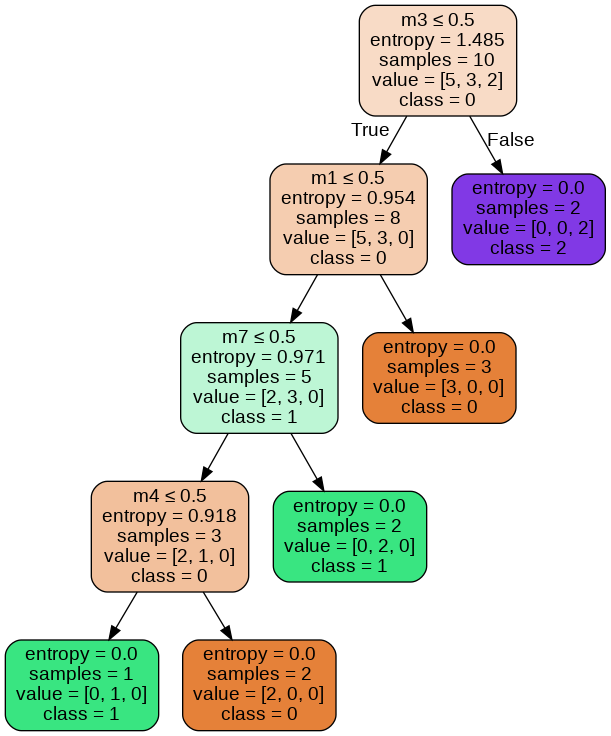

In [13]:
feature_cols=['m1', 'm2','m3','m4','m5', 'm6','m7','m8','m9']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# 
Image(graph.create_png())

In [15]:
# we are able to save the tree as follows
graph.write_png('/content/drive/My Drive/Python-Examples-Prof. salwani/3. Decision Tree /TicTacToe_Decision_Tree.png')

True